# Hãy hoàn thành yêu cầu sau đây

Bài 1: Cho tập ảnh như trong thư mực 'images/*.*'. Ảnh có 2 đồ vật được xếp ở vị trí bât kỳ trên mặt phẳng. Hãy tính góc tạo bởi hai đồ vật này. Code cần được comment đầy đủ, giải thích ý đồ ở từng phần. Học viên nên hiển thị kết quả trung gian để minh họa tính đúng đắn ở mỗi giai đoạn.
- Bước 1: Học viên có thể sử dụng các bộ tham số khác nhau cho từng ảnh.
- Bước 2: Hãy chọn bộ tham số phù hợp cho tất cả các ảnh trên.

Có nhiều cách để giải bài toán này. Một trong những ý tưởng để thực hiện bài toán này là:
- Thực hiện việc phát hiện biên và đường thẳng qua các thuật toán đã học
- Gom nhóm các góc thành 2 nhóm tương ứng với 2 đối tượng trên ảnh
- Tính toán góc giữa 2 vật thể và đưa ra góc cũng như thông báo có song song với nhau hay không.

In [2]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import glob
import os

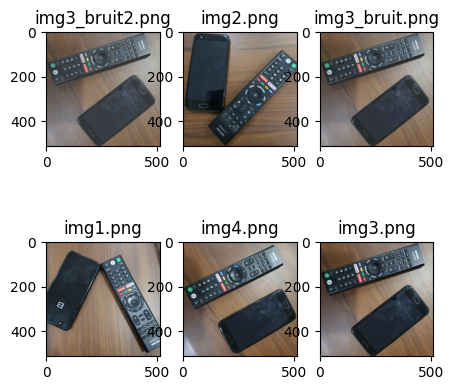

In [3]:
## Đọc ảnh 
images=glob.glob('images/*.png')
column=3
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(5,5))
for i,fname in enumerate(images):
    img=cv2.imread(fname)
    plt.subplot(row,column,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname))
plt.show() 

In [4]:
# help me define a function to diplay line of objects
def canny_edge_detection(image_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=30):
    ### YOUR CODE HERE ###
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0)
    img_median = cv2.medianBlur(img_gaussian, blur_ksize)

    img_canny = cv2.Canny(img_median, threshold1, threshold2) #Lọc Canny theo 2 ngưỡng threshold1 và threshold2
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
            if img_canny[i][j] < skipping_threshold:
                img_canny[i][j] = 0
            else:
                img_canny[i][j] = 1
    return img_canny

In [5]:
def display_lines(image_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=50):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    img_canny = canny_edge_detection(image_path, blur_ksize, threshold1, threshold2, skipping_threshold)
    
    lines = cv2.HoughLinesP(img_canny, 1, np.pi/180, 100, minLineLength=150, maxLineGap=50)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img

def angle_between_lines(img_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=50):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_canny = canny_edge_detection(img_path, blur_ksize, threshold1, threshold2, skipping_threshold)
    
    lines = cv2.HoughLinesP(img_canny, 1, np.pi/180, 100, minLineLength=150, maxLineGap=50)
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        angles.append(angle)
        final_angle = np.mean(angles)
    return final_angle

def plot_img_with_angle(img_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=50):
    img = display_lines(img_path, blur_ksize, threshold1, threshold2, skipping_threshold)
    angle = angle_between_lines(img_path, blur_ksize, threshold1, threshold2, skipping_threshold)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Angle: {angle}')
    plt.show()


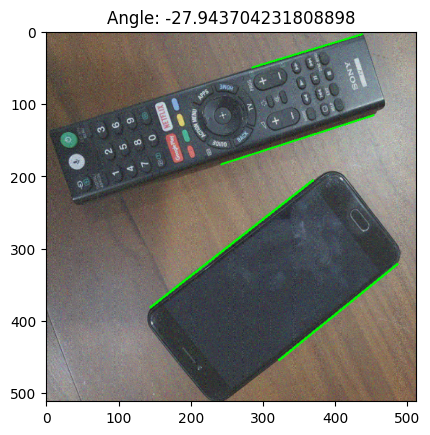

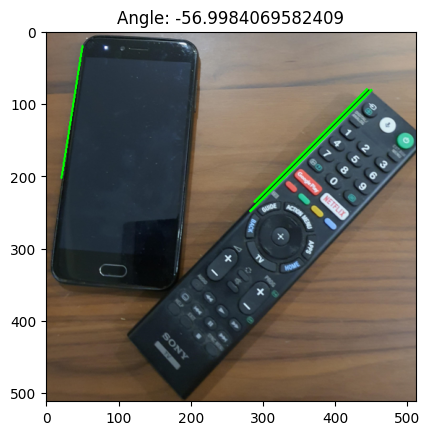

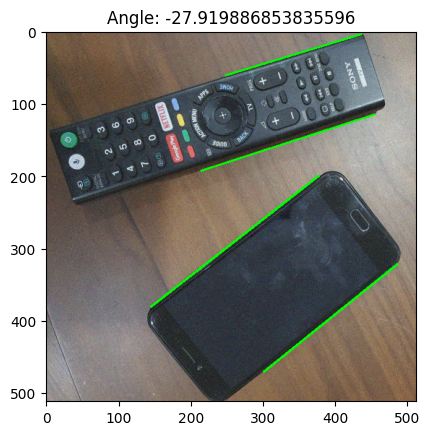

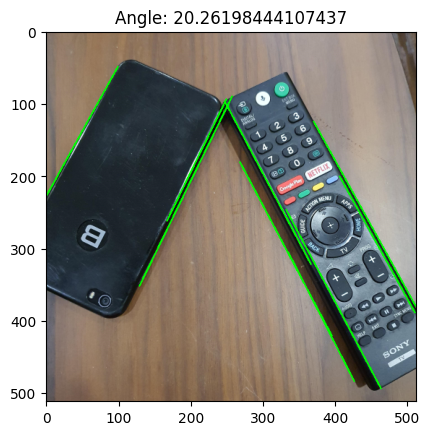

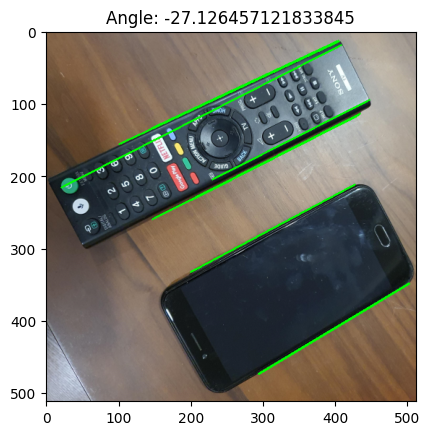

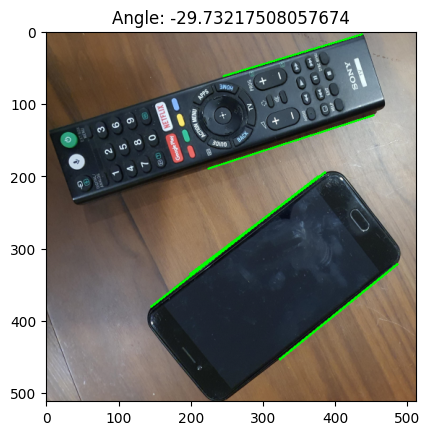

In [6]:
images = glob.glob('images/*.png')
for img_path in images:
    plot_img_with_angle(img_path)
    

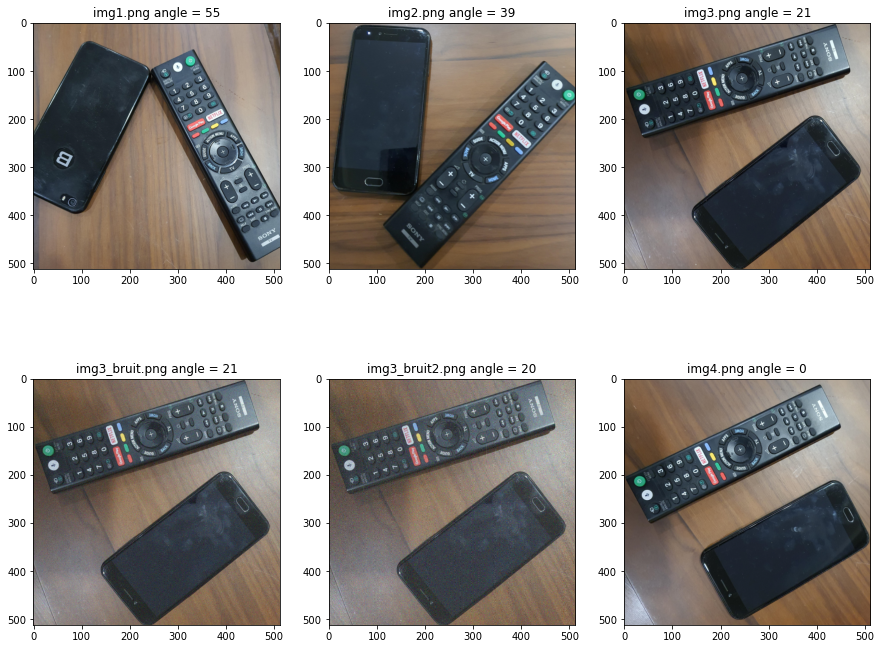

In [6]:
## Hiển thị kết quả 
images=glob.glob('images/*.png')
column=3
row=int(math.ceil(len(images)/column))
column, row
plt.figure(figsize=(15,12))
for i,fname in enumerate(images):
    
    angle = angle_between_objects(....) #YOUR CODE HERE
    plt.subplot(row,column,i+1)
    
    img=cv2.imread(fname)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(fname) + ' angle = ' + str(angle))
plt.show() 